In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [74]:
data = pd.read_csv('spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.shape

(5171, 4)

In [4]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [75]:
data = data.drop(['Unnamed: 0', 'label_num'], axis=1)

In [76]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


<AxesSubplot:xlabel='label', ylabel='count'>

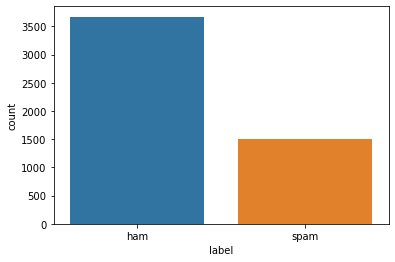

In [77]:
sns.countplot(x='label', data=data)

In [78]:
data['label'] = data['label'].apply(lambda x: 0 if x=='ham' else 1)

In [79]:
data.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.2)

### CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vector = CountVectorizer()
v_count = vector.fit_transform(x_train)
v_count.toarray()

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()

In [48]:
multi.fit(v_count, y_train)

MultinomialNB()

In [49]:
x_test_count = vector.transform(x_test)
multi.predict(x_test_count)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
test = vector.transform(emails)
multi.predict(test)

array([0, 1], dtype=int64)

In [60]:
multi.score(x_test_count, y_test)

0.978743961352657

### PipeLine

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [55]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [56]:
pipeline.predict(emails)

array([0, 1], dtype=int64)

In [57]:
pipeline.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
pipeline.score(x_test, y_test)

0.978743961352657